## 测量因子

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.cluster.hierarchy import single

from Utility.factorFactory import FactorFactory
from Utility.Util import evaluate_time_series_ic
import matplotlib.pyplot as plt

### （1）预处理数据：

In [2]:
df = pd.read_csv ('df_minute.csv')
df.shape

(1920, 16)

In [3]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'dollar_volume',
       'vwap', 'tick_count', 'trade_size_mean', 'trade_size_std',
       'zero_return_count', 'price_direction_ratio', 'large_trade_count',
       'large_trade_ratio', 'large_trade_volume_ratio'],
      dtype='object')

In [4]:
finfact = FactorFactory (df)

In [5]:
finfact.generate_factors (layers=2, include_only_bounded_factors=True)
df_featured = finfact.df_features
df_featured.shape

🔄 Layer 2 cross: 100%|██████████| 4900/4900 [00:00<00:00, 76026.77it/s]


(1901, 4901)

### （3）评测因子：

In [6]:
finfact.evaluate_factors (forward_period=5, window=100, top_k=1000)
summary = finfact.get_ic_summary (sort_by='spearman_ic', by_abs=True)

🔍 Evaluating IC: 100%|██████████| 4900/4900 [00:04<00:00, 1219.25it/s]


In [7]:
summary

,spearman_ic,pearson_ic_mean,pearson_ic_std,pearson_ic_ir,combined_score
bb_pband_10_2.0_minus_bb_pband_20_1.5,0.085988,0.149605,0.154941,0.965561,1.051549
bb_pband_20_1.5_minus_bb_pband_10_2.0,-0.085988,-0.149605,0.154941,-0.965561,1.051549
bb_pband_20_1.5_mul_rsi_14_low,-0.079150,-0.181713,0.148427,-1.224261,1.303411
rsi_14_low_mul_bb_pband_20_1.5,-0.079150,-0.181713,0.148427,-1.224261,1.303411
bb_pband_20_2.0_mul_rsi_14_low,-0.078254,-0.182511,0.146758,-1.243618,1.321872
...,...,...,...,...,...
rsi_6_large_trade_volume_ratio_mul_rsi_14_close,-0.022233,-0.152629,0.138291,-1.103682,1.125914
rsi_10_low_mul_rsi_6_large_trade_volume_ratio,-0.019852,-0.099233,0.093499,-1.061327,1.081179
rsi_6_large_trade_volume_ratio_mul_rsi_10_low,-0.019852,-0.099233,0.093499,-1.061327,1.081179
rsi_6_large_trade_volume_ratio_mul_rsi_14_low,-0.012895,-0.098455,0.095145,-1.034784,1.047678


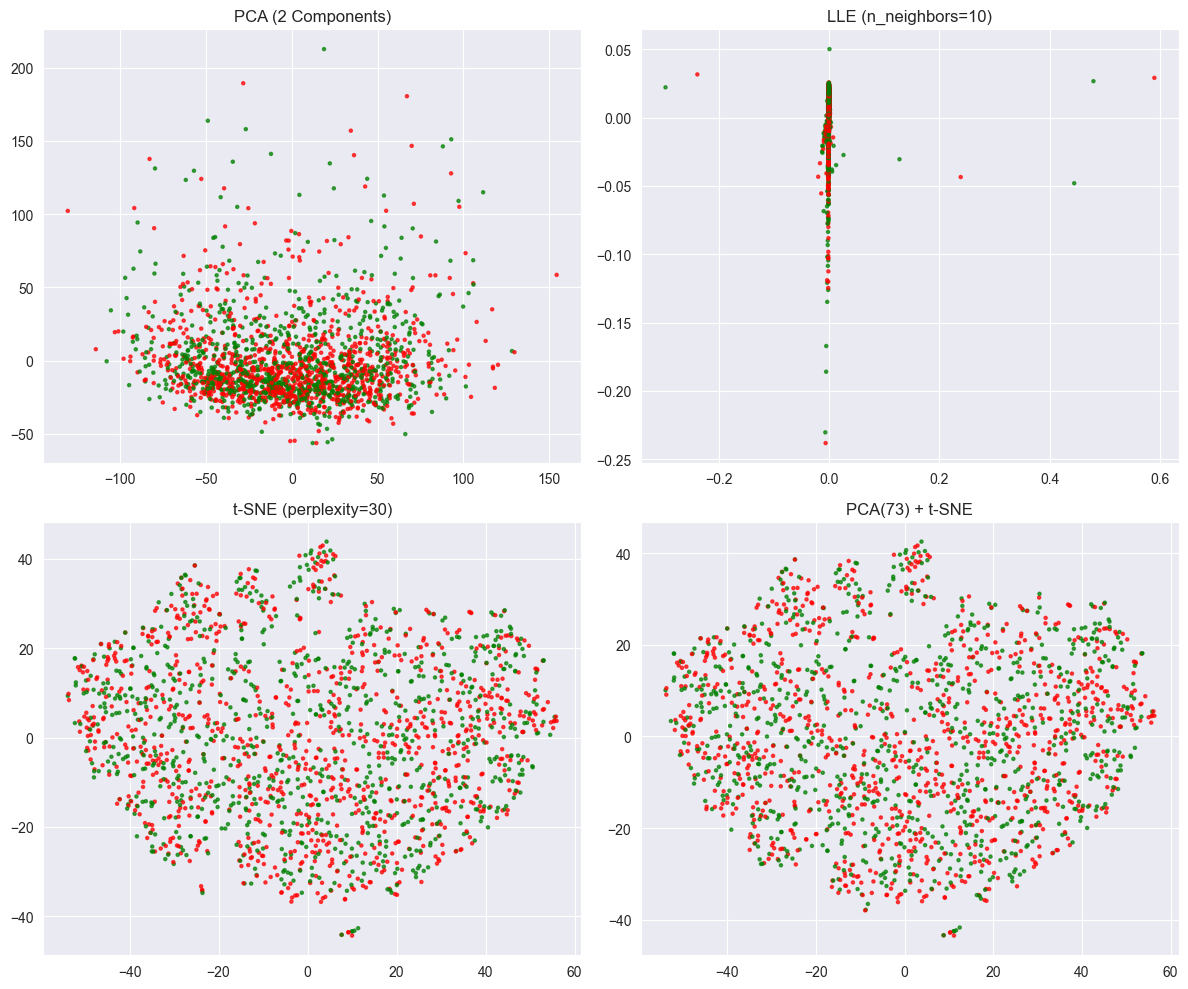

In [8]:
finfact.visualize_structure_2d (target_col='close',
                                lle_n_neighbors=10,
                                tsne_perplexity=30,
                                forward=5,
                                random_state=42)

In [9]:
finfact.filter(k=100,corr_combine='average')

🔍 Spearman rows: 100%|██████████| 4900/4900 [12:37<00:00,  6.47it/s]


{'kept': ['rsi_10_large_trade_ratio_minus_rsi_14_close',
  'rsi_6_price_direction_ratio_minus_rsi_10_trade_size_std',
  'cos_rsi_10_open',
  'sin_rsi_6_high',
  'sin_rsi_14_volume',
  'sin_rsi_10_large_trade_volume_ratio',
  'sin_rsi_6_close',
  'cos_rsi_6_zero_return_count',
  'sin_rsi_10_low',
  'cos_rsi_6_close',
  'cos_rsi_14_close',
  'sin_rsi_10_open',
  'cos_rsi_10_vwap',
  'sin_rsi_6_low',
  'rsi_6_high_minus_rsi_6_open',
  'sin_rsi_10_price_direction_ratio',
  'cos_rsi_6_price_direction_ratio',
  'sin_rsi_6_open',
  'cos_rsi_6_vwap',
  'cos_rsi_10_close',
  'cos_rsi_14_high',
  'sin_rsi_14_high',
  'sin_rsi_10_vwap',
  'cos_rsi_6_high',
  'cos_rsi_6_trade_size_mean',
  'cos_rsi_10_low',
  'sin_rsi_6_zero_return_count',
  'sin_rsi_6_price_direction_ratio',
  'cos_rsi_14_large_trade_count',
  'cos_rsi_6_open',
  'cos_rsi_6_large_trade_ratio',
  'sin_rsi_6_vwap',
  'cos_rsi_10_price_direction_ratio',
  'sin_rsi_14_open',
  'sin_rsi_6_trade_size_std',
  'sin_rsi_10_close',
  'cos_

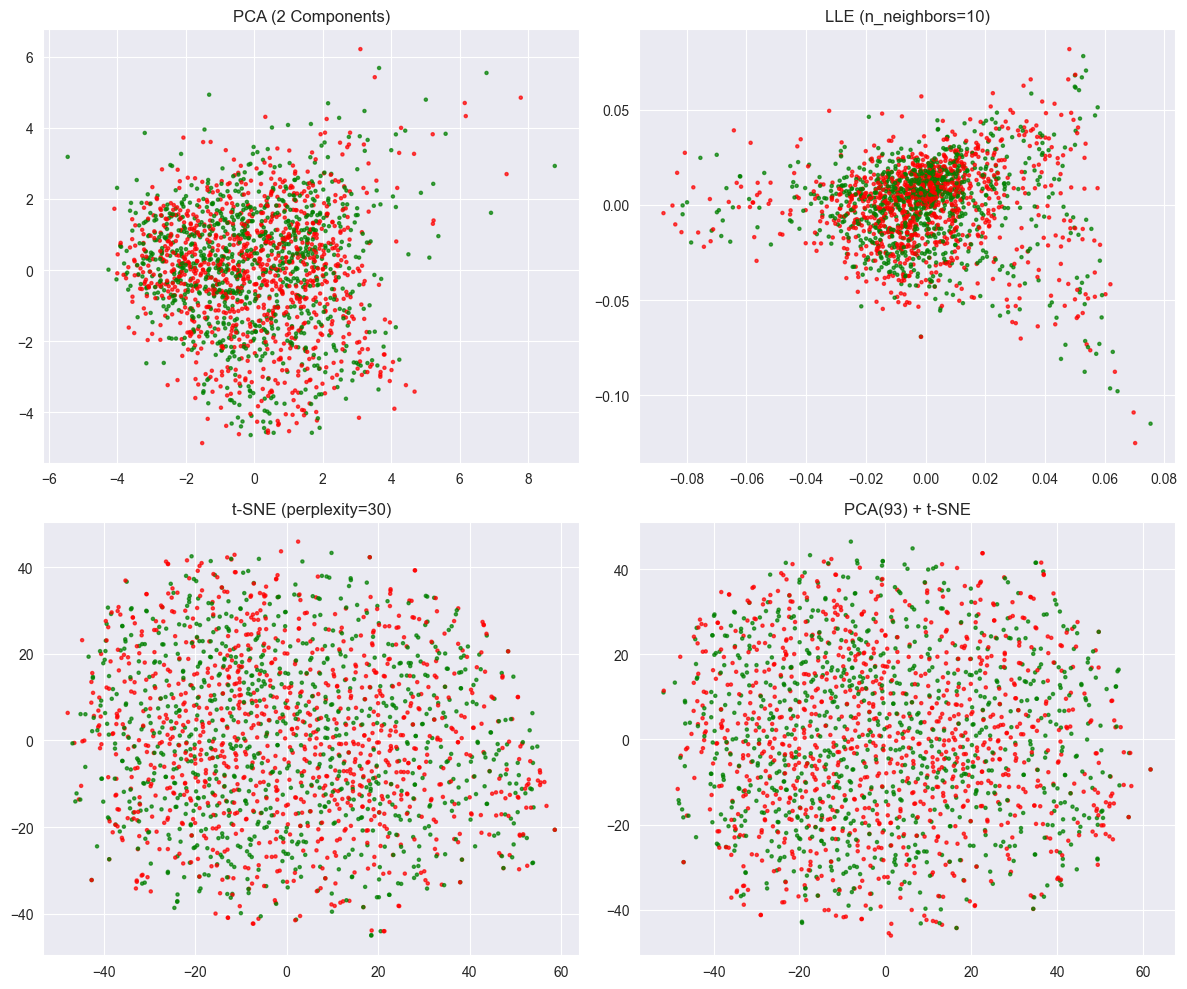

In [10]:
finfact.visualize_structure_2d (target_col='close',
                                lle_n_neighbors=10,
                                tsne_perplexity=30,
                                forward=5,
                                random_state=42)

In [11]:
finfact.evaluate_factors(forward_period=5, window=100, top_k=1000)
summary = finfact.get_ic_summary(sort_by='spearman_ic', by_abs=True)

🔍 Evaluating IC: 100%|██████████| 100/100 [00:00<00:00, 1485.20it/s]


In [12]:
summary

,spearman_ic,pearson_ic_mean,pearson_ic_std,pearson_ic_ir,combined_score
rsi_10_large_trade_ratio_minus_rsi_14_close,0.071758,0.200917,0.142349,1.411442,1.483201
cos_rsi_14_low,0.057646,0.072160,0.149028,0.484203,0.541849
sin_rsi_6_zero_return_count,0.054398,0.049680,0.115223,0.431161,0.485559
bb_pband_20_2.0_minus_bb_pband_10_1.5,-0.049993,-0.024203,0.153309,-0.157873,0.207867
sin_rsi_10_large_trade_count,-0.049256,-0.044471,0.096105,-0.462729,0.511986
...,...,...,...,...,...
sin_rsi_6_close,-0.001041,-0.016562,0.084575,-0.195828,0.196870
cos_rsi_14_high,0.000648,0.014414,0.088024,0.163747,0.164395
rsi_6_price_direction_ratio_minus_rsi_10_trade_size_std,0.000581,-0.007271,0.101419,-0.071689,0.072270
cos_rsi_6_tick_count,-0.000415,0.010795,0.117497,0.091877,0.092293


#### IC分析

#### 相关性检测

In [16]:
df_filtered = finfact.df_features.set_index('timestamp')

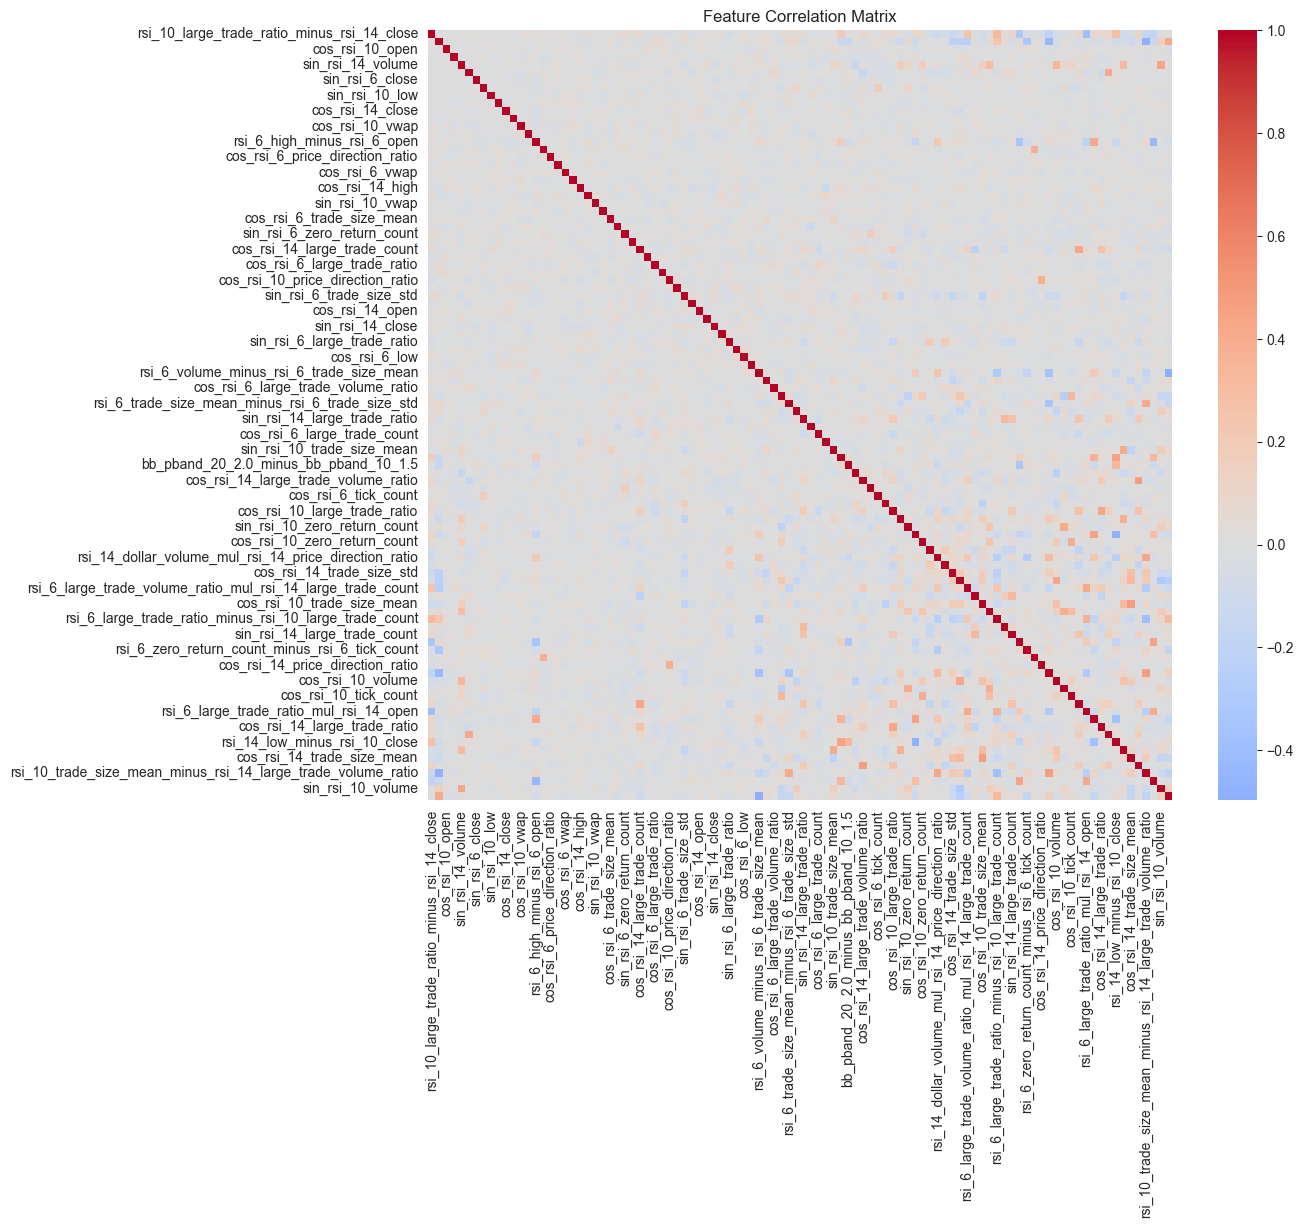

In [17]:
corr = pd.DataFrame (df_filtered).corr ()
plt.figure (figsize=(12, 10))
sns.heatmap (corr, cmap='coolwarm', center=0)
plt.title ('Feature Correlation Matrix')
plt.show ()

#### PCA分析

In [18]:
from sklearn.decomposition import PCA

pca = PCA ()
pca.fit (df_filtered)
percent = 0.99

cumulative = np.cumsum (pca.explained_variance_ratio_)
n_PCs = np.argmax (cumulative >= percent) + 1

print (f"前 {n_PCs} 个主成分累计解释了 {cumulative[n_PCs - 1]:.2%} 的方差")
feature_names = df_featured.columns

# 打印所有有重大贡献的主成分
for i in range (n_PCs):
    # 第 i 个主成分的系数
    pc = pca.components_[i]

    # 取绝对值最大的特征位置
    top_feature_idx = np.argmax (np.abs (pc))
    top_feature_name = feature_names[top_feature_idx]

    print (f"PC{i + 1} 的主导因子是: {top_feature_name}（贡献系数: {pc[top_feature_idx]:.4f}）")

前 3 个主成分累计解释了 99.89% 的方差
PC1 的主导因子是: rsi_6_zero_return_count_mul_rsi_10_close（贡献系数: 0.8670）
PC2 的主导因子是: rsi_6_zero_return_count_mul_rsi_10_dollar_volume（贡献系数: 0.8389）
PC3 的主导因子是: rsi_6_zero_return_count_minus_rsi_10_dollar_volume（贡献系数: 0.9696）
